### Probability - Coin Flips and Experiments

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(color_codes=True)
sns.set_style("white")

np.random.seed(0)

In [43]:
np.random.uniform(low=0.0, high=1.0)

0.5488135039273248

In [44]:
# generate a flip
def flip(iteration_times = 1):
  flips = []
  for _ in range(iteration_times): 
    num = np.random.uniform(0.0, 1.0)
    if num > 0.5:
      flips.append("H")
    else: 
      flips.append("T")
  return flips

In [45]:
flips = flip(10)
flips

['H', 'H', 'H', 'T', 'H', 'T', 'H', 'H', 'T', 'H']

In [46]:
values, counts = np.unique(flips, return_counts=True)

In [47]:
values, counts

(array(['H', 'T'], dtype='<U1'), array([7, 3]))

In [48]:
from collections import Counter, defaultdict

In [59]:
def get_frequencies(flips): 
  keys = Counter(flips).keys()
  vals = Counter(flips).values()
  return defaultdict(int, zip(keys, vals))

In [74]:
freqs = get_frequencies(flips)
freqs

defaultdict(int, {'H': 7, 'T': 3})

In [79]:
prob_head = freqs['H'] / len(flips)
prob_tail = freqs['T'] / len(flips)
prob_head, prob_tail

(0.7, 0.3)

### Experiment: Prob calculated based on 1 flip up to N flips

In [84]:
maximum_flips = 1000

probs_head = []
for num_flips in range(1, maximum_flips):
  flips = flip(num_flips)
  freqs = get_frequencies(flips)
  prob_head = freqs['H'] / len(flips)
  probs_head.append(prob_head)

# this freqs are at the end of loop
freqs

defaultdict(int, {'T': 488, 'H': 511})

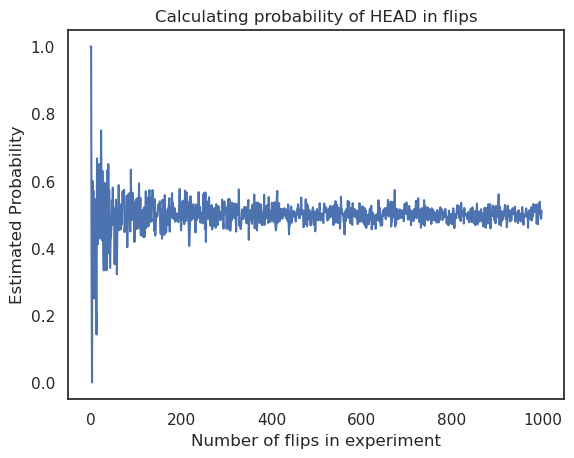

In [88]:
plt.plot(probs_head)

plt.xlabel("Number of flips in experiment")
plt.ylabel("Estimated Probability")
plt.title("Calculating probability of HEAD in flips")

plt.show()

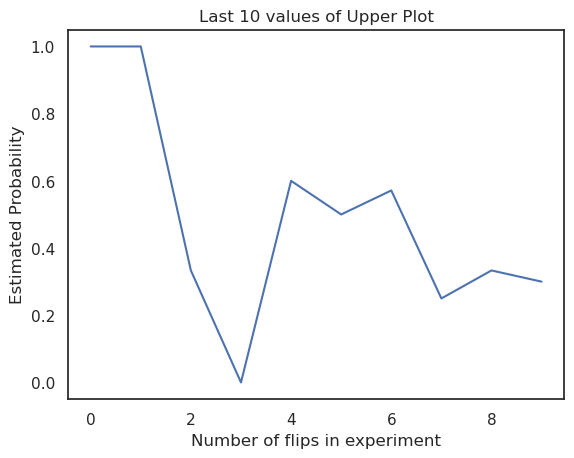

In [89]:
plt.plot(probs_head[:10])

plt.xlabel("Number of flips in experiment")
plt.ylabel("Estimated Probability")
plt.title("Last 10 values of Upper Plot")

plt.show()

### Plot using Bokeh

In [159]:
from bokeh.io import show, output_notebook
from bokeh.plotting import figure

output_notebook()

Loading BokehJS ...

In [160]:
p = figure(
          title="Probability of HEAD in flips", 
          x_axis_label="Number of flips in Experiment", 
          y_axis_label="Estimated Probabilities",
        )

In [165]:
x = list(range(1, maximum_flips))
p.line(x=x, y=probs_head)

show(p)